In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('../datasets/Split_Wise.csv')
df.head()

,Date,Description,Category,Cost,Currency,Het Varasada,Krish Chaniyara,VAIBHAV SANEPARA,21BECE3O279 Sarang Santoki,Hst Sagar,0xNishchit (removed),deep patel (removed)
0,2023-03-13,Lauch snacks coke+ nescafe,Groceries,130.00,INR,0.0,0.0,-45.0,0.0,0.0,85.0,-40.0
1,2023-03-13,Butterscotch Cone,General,90.00,INR,0.0,-30.0,-30.0,0.0,0.0,60.0,0.0
2,2023-03-15,Nasto,General,165.00,INR,0.0,-20.0,-20.0,0.0,0.0,-45.0,85.0
3,2023-03-15,Bus g to b,Bus/train,490.00,INR,0.0,-122.5,367.5,0.0,0.0,-122.5,-122.5
4,2023-03-15,Citybus,General,80.00,INR,0.0,60.0,-20.0,0.0,0.0,-20.0,-20.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        767 non-null    object 
 1   Description                 767 non-null    object 
 2   Category                    767 non-null    object 
 3   Cost                        767 non-null    object 
 4   Currency                    767 non-null    object 
 5   Het Varasada                767 non-null    float64
 6   Krish Chaniyara             767 non-null    float64
 7   VAIBHAV SANEPARA            767 non-null    float64
 8   21BECE3O279 Sarang Santoki  767 non-null    float64
 9   Hst Sagar                   767 non-null    float64
 10  0xNishchit (removed)        767 non-null    float64
 11  deep patel (removed)        767 non-null    float64
dtypes: float64(7), object(5)
memory usage: 72.0+ KB


In [123]:
user_names = df.select_dtypes(include=['float']).columns
user_names

Index(['Het Varasada', 'Krish Chaniyara', 'VAIBHAV SANEPARA',
       '21BECE3O279 Sarang Santoki', 'Hst Sagar', '0xNishchit (removed)',
       'deep patel (removed)'],
      dtype='object')

In [175]:
def total_spend(user_names):
    user_total = 0

    # net value spend by user 
    user_net_spend_df = df[df[user_names] < 0]
    user_net_spend_value = abs(user_net_spend_df[user_names].sum())

    # payment done by user
    user_pay_df = df[df[user_names] > 0]
    user_pay_value = user_pay_df[user_names].sum()
     
    # user share on payment done by him 
    x = 0
    for i in user_pay_df['Cost']:
        if i:
            try:
                float_value = float(i)
                x = x+float_value
                # print(float_value)
            except ValueError:
                print("Invalid float value")
    else:
        print("String is empty")

    # user spend with pay & net spend 
    user_total = (x-user_pay_value) + user_net_spend_value

    return user_total

total_spend('VAIBHAV SANEPARA')

String is empty


19802.48

In [176]:
user_spends  = []
for i in user_names[:5]:
    user_spends.append(total_spend(i))
user_spends

Invalid float value
String is empty
String is empty
String is empty
String is empty
Invalid float value
String is empty


[22915.34, 11298.32, 19802.48, 11874.76, 21179.229999999996]

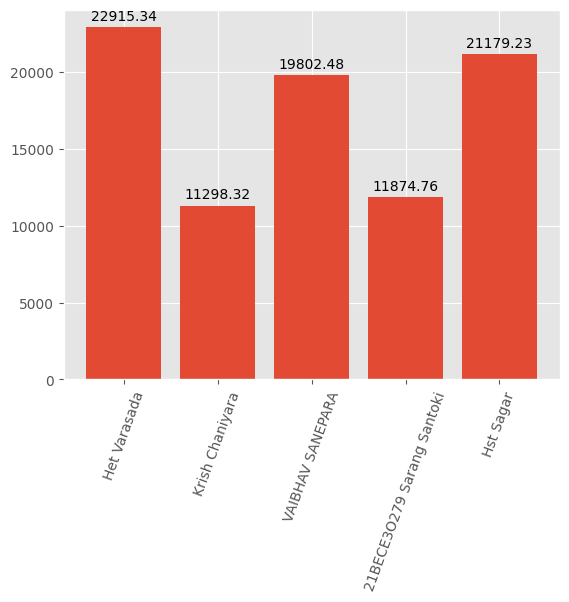

In [172]:
df_re = pd.DataFrame({'user':user_names[:5],'spend':user_spends})
plt.style.use('ggplot')
bars = plt.bar(df_re['user'],df_re['spend'])
plt.xticks(rotation=70)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{round(height,2)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')
plt.show()